In [2]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram,rescale_intensity
from matplotlib.pyplot import bar


In [3]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

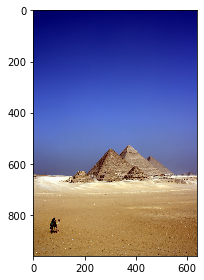

In [4]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



In [5]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(histogramImg,width=0.01):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

In [6]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''


"\n@TODO:\nRequirement #1 \n-Read and print image 'coffee'  \n-Show and print half of the  image\n-----hint :use the attribute shape of numpy to get the image object dimentions\n"

Original image shape is:(446, 640, 3)
half image shape is:(223, 640, 3)


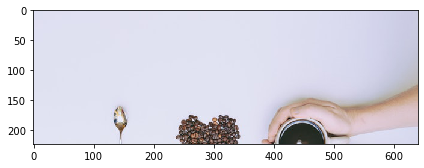

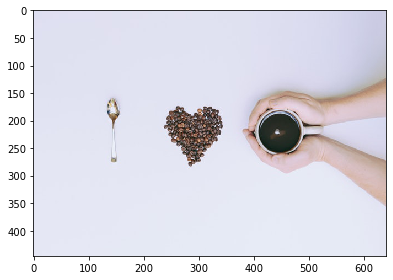

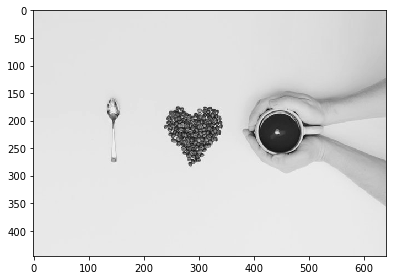

In [7]:
coffee_img=io.imread('coffee.jpeg')
print("Original image shape is:"+str(coffee_img.shape))
coffee_half=coffee_img[0:int(coffee_img.shape[0]/2), :]
print("half image shape is:"+str(coffee_half.shape))

io.imshow(coffee_half)
io.show()

io.imshow(coffee_img)
io.show()

io.imshow(rgb2gray(coffee_img))
io.show()


In [7]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''

    

"\n@TODO:\nRequirement #2 \nRGB to gray and HSV:\n1- Write a function 'gray_image' that takes an image as input , then\n    -get the gray scale of the image, then\n    -display original image and the gray scale one side by side (subplot).\n    -hint: use rgb2gray to get the graylevel of the image\n- test your function with the image 'pyramids'\n    \n2- Write a function 'HSV_image' that takes an image as input , then\n   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).\n   -hint: -use rgb2hsv (to get the hsv representation of the image).\n          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], \n           where hsvImg is the hsv representation of the image. \n           Hue is the first channel, Saturation is the second and value is the last channel.\n- test your function for the images in HSV Folder. And comment on the results. \n"

In [8]:
def gray_image(image_path):
    orig_img=io.imread(image_path)
    #gray_img=io.imread(image_path, as_gray=True)
    gray_img=rgb2gray(orig_img)
    show_images([orig_img,gray_img],["Original image","Gray scale image"])
    
def HSV_image(image_path):   
    orig_img=io.imread(image_path)   
    hsv_img=rgb2hsv(orig_img)
    hue_channel=hsv_img[:,:,0]
    sat_channel=hsv_img[:,:,1]
    val_channel=hsv_img[:,:,2]
    show_images([orig_img,hue_channel,sat_channel,val_channel],["original image *rgb*","HUE CHANNEL","SAT CHANNEL","VAL CHANNEL"])

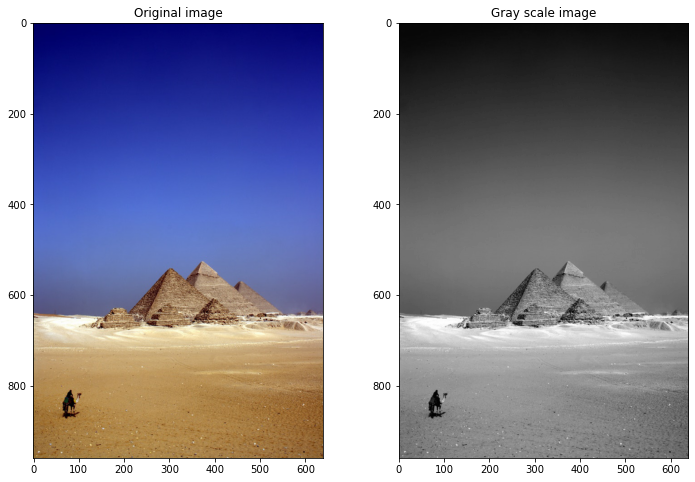

In [9]:
gray_image("pyramids.jpeg")

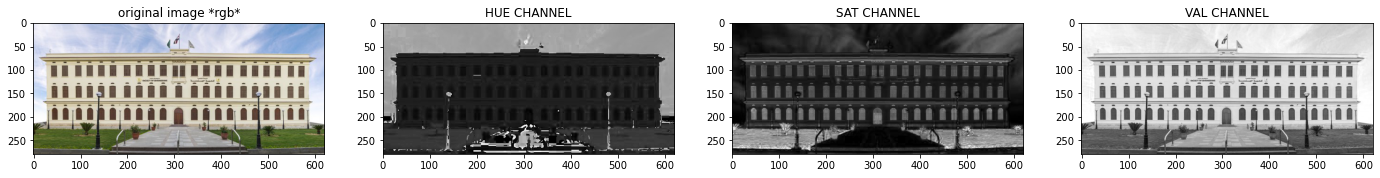

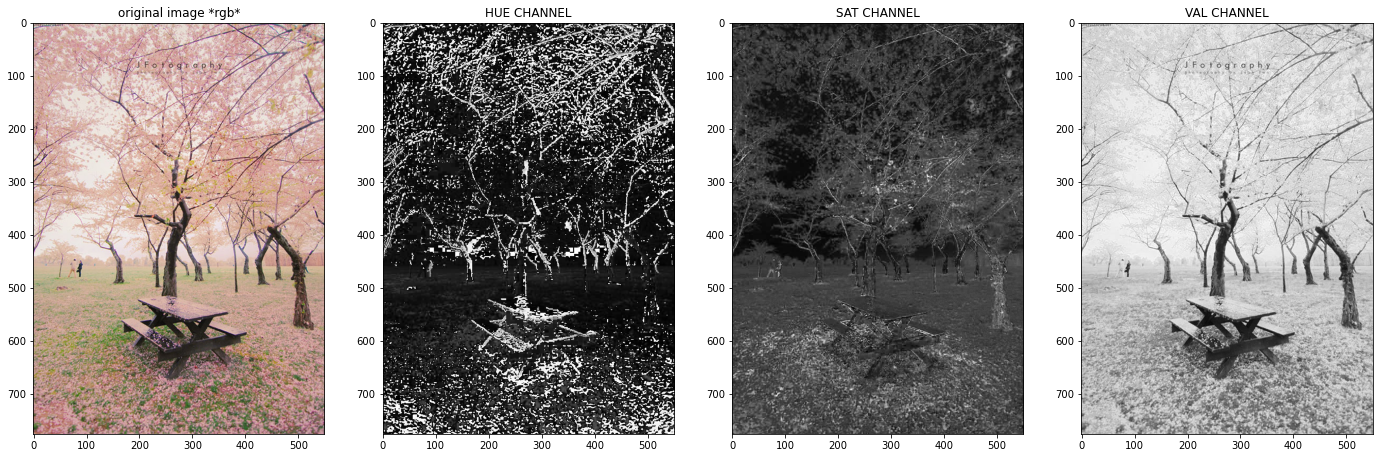

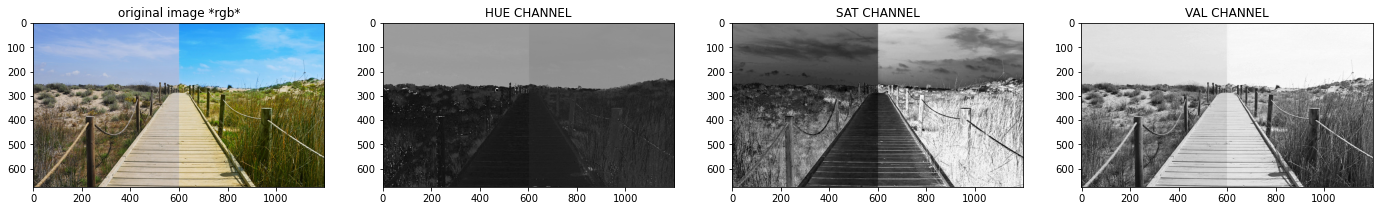

In [10]:
'''
FOR HUE CHANNEL
the sky is blue and blue is the highest value in hue channel so it's shown brighter than others, windows are near to red and
red has the value 0 in the hue channel so it's the darkest part in the hue channel.

FOR SATURATION CHANNEL
the grass is pure green so the saturation value is high on the other hand the path to the door is grey and don't have
pure color (it's a mixture of other colors) so it takes a very low value in saturation.

FOR VALUE CHANNEL
sky is the brightest part in the original image so it takes the highest value in the value channel, and light pillars are black 
in the original image so it takes the lowest value in the value channel.
'''

HSV_image('./hsv/ex1.png')

'''
FOR HUE CHANNEL
Pink color in the original photo has high value in hue, so it appears white in the hue channel of the image.

FOR SATURATION CHANNEL
it's obvious that the original channel has low saturation and most of colors are mixed so all pixels in saturation channel 
are taking low values.

FOR VALUE CHANNEL
the original image is bright so the pixels in value channel take high values.
'''
HSV_image('./hsv/ex2.jpg')


'''
For SATURATION CHANNEL
it's obvious that the right part of the photo is much more saturated relative to the left part of the image
so in the sat channel all pixels in the right part takes higher values from the pixels in the left part.

FOR VALUE CHANNEL
The right part in the original image is brighter than the left image, so in the value channel -which reflects the brightness-
all pixels in the right part are higher than pixels in the left part.
'''
HSV_image('./hsv/ex3.jpg')

In [10]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''


'\nRequirement 2 (Noise):\nhttp://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise\n\n1.For an image of your choice (the effect of noise must be obvious): \n    Read the image.\n    Convert it to greyscale.\n    Apply salt & pepper noise with \n    amount=0.05, 0.5 and 0.9\n   \n2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    \n    '

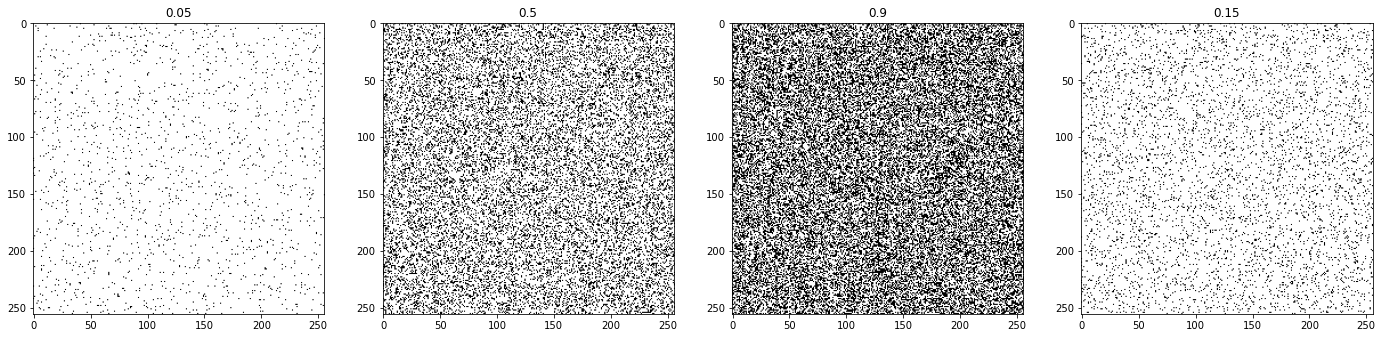

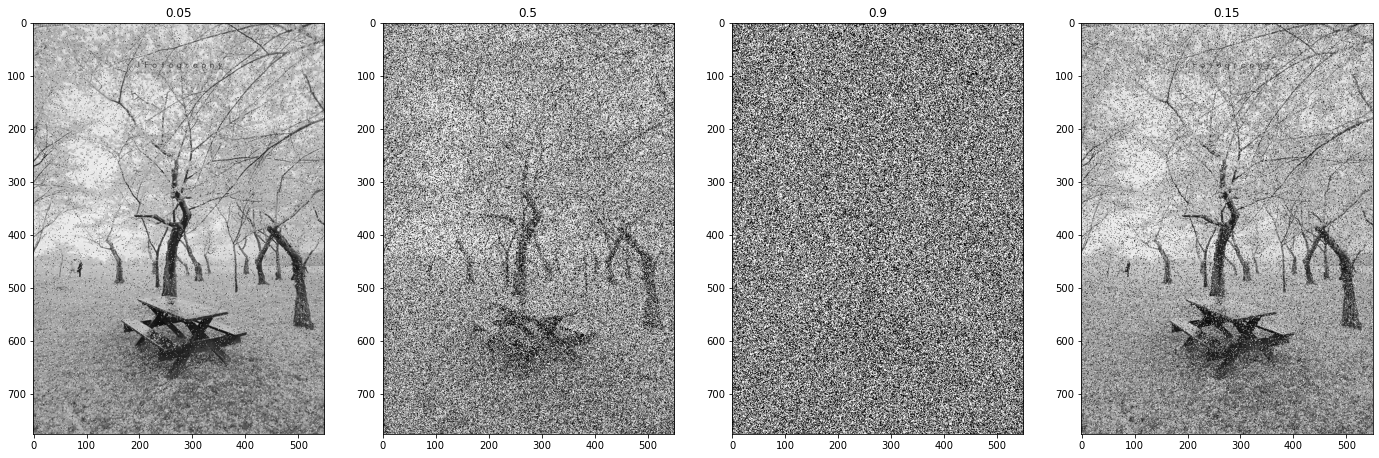

'\n- We recommend: the "hsv/ex2.jpg"\n - Reason: the image has high frequency, its colors are changing rapidly. The random noise affects low frequency\n   parts, ie. tree trunks and the table, more than high frequency parts, tree leaves,.  \n    '

In [12]:
noises = [0.05, 0.5, 0.9, 0.15]

uniformImage=np.full((256,256),fill_value = 1.0)
uniformimgs = []
for noise in noises:
     uniformimgs.append(random_noise(uniformImage, mode = 's&p', amount = noise))
show_images(uniformimgs, noises)

imgs = []
original_img = io.imread('./hsv/ex2.jpg')
gray_scale_img = rgb2gray(original_img)
for noise in noises:
    imgs.append(random_noise(gray_scale_img, mode = 's&p', amount = noise))
show_images(imgs, noises)
'''
- We recommend: the "hsv/ex2.jpg"
 - Reason: the image has high frequency, its colors are changing rapidly. The random noise affects low frequency
   parts, ie. tree trunks and the table, more than high frequency parts, tree leaves,.  
    '''

In [13]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''

'\nRequirement 3 (Histogram):\n\n1- For the given images ( in histogram folder): \n    Read the image.\n    Apply histogram and show it.\nHint\n    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?\n    B) and function(showHist) to draw it.\n** 2- Draw a grey-scale image that has uniform histogram \nsame number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.\nuse np.ones to draw image with ones.\n'

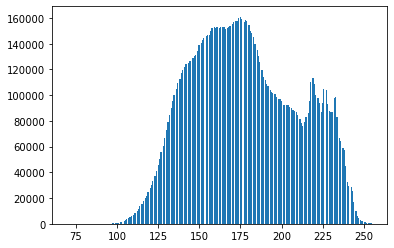

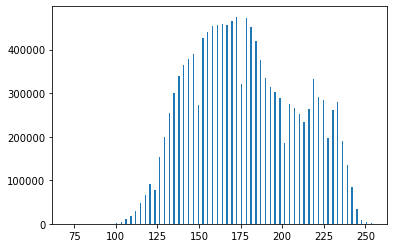

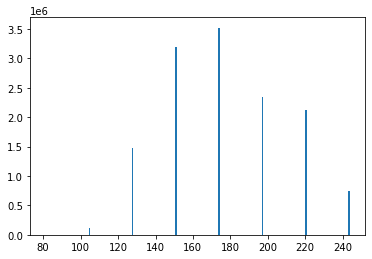

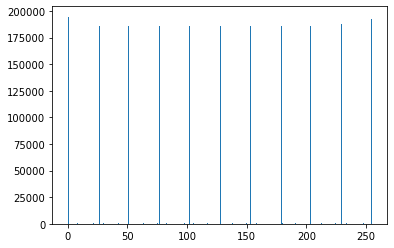

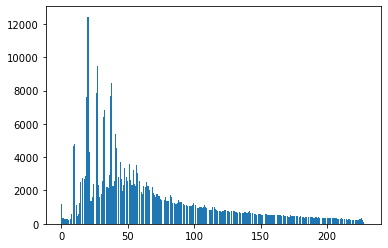

In [33]:
#Ex1
#Most of colors are grey
exampleImg=io.imread(fname='./histogram/ex1.jpg',as_gray=True)

#256 pin, the one and only option when integer image values.
#bar width must be relatively large (0.8).
hist=histogram(exampleImg)
showHist(hist,0.8)

#64 pin, means treat every 4 colors as one color.
#Here, we must rescale image to values between 0,1 to be able to use nbins.
#bar width must be relatively large (0.01).

#exampleImg=exampleImg[:,:,0]/255

hist=histogram(exampleImg,nbins=64)
showHist(hist,0.01)
#8 pin, means treat every 32 colors as one color.
hist=histogram(exampleImg,nbins=8)
showHist(hist,0.01)

#Ex2
#11 peaks means only 11 colors in the image
exampleImg=io.imread(fname='./histogram/ex2.png',as_gray=True)
hist=histogram(exampleImg)
showHist(hist,0.01)

#Ex3
#Dark colors are dominant
exampleImg=io.imread(fname='./histogram/ex3.png',as_gray=True)
hist=histogram(exampleImg)
showHist(hist,0.8)

In [1]:
#dtype = int, as it clipping it 0:1 if it's float, so image is totally white
#3 channels to be gray-scale
uniformImage=np.zeros((256,256,3),dtype=np.uint8)

for i in range(256):
        uniformImage[i,:,:]=i       
io.imshow(uniformImage)
io.show()
hist=histogram(rgb2gray(uniformImage))
showHist(hist,0.5)

NameError: name 'np' is not defined